<a href="https://colab.research.google.com/github/june-oh/cseg109/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오디오 인식 및 음성 합성 실습 (LAB-01)
- Numpy, matplotlib
- Python을 이용한 기초 신호 처리
- Audacity를 이용한 오디오 파일 분석
- PRAAT을 이용한 오디오 전사 실습

# NumPy, matplotlib 튜토리얼

> 본 튜토리얼은 [cs231n 튜토리얼](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb)과 해당 튜토리얼의 [한국어 번역본](https://github.com/aikorea/cs231n/blob/master/python-numpy-tutorial.md)을 참고하여 제작되었습니다.

## [Numpy](https://github.com/numpy/numpy)

<img src="https://github.com/numpy/numpy/raw/main/branding/logo/primary/numpylogo.svg" height=120>

NumPy는 Python을 사용한 과학적 컴퓨팅을 위한 기본 패키지

다음과 같은 기능을 제공

- 강력한 N차원 배열 객체
- brodacasting 기능
- C/C++ 및 Fortran 코드 통합을 위한 도구
- 유용한 선형 대수학, 푸리에 변환 및 난수 기능

<br><br>


NumPy를 사용하기 위해 우선 `numpy` 패키지를 import합니다.

>Note : import `Module` as `Name`
>
>으로 import 시에는 `Module`을 `Name`으로 접근 가능합니다.


In [ ]:
import numpy as np

## Arrays
Numpy 배열은 동일한 자료형을 가지는 값들이 격자판 형태로 있는 것입니다. 각각의 값들은 튜플(이때 튜플은 양의 정수만을 요소값으로 갖습니다.) 형태로 색인 됩니다. rank는 배열이 몇 차원인지를 의미합니다; shape는 는 각 차원의 크기를 알려주는 정수들이 모인 튜플입니다.

파이썬의 리스트를 중첩해 Numpy 배열을 초기화 할 수 있고, 대괄호를 통해 각 요소에 접근할 수 있습니다:

In [ ]:
a = np.array([1, 2, 3])
print(type(a), a.shape, a[0],a[1],a[2])
print(a)
a[0]=5      # Change an element of the array
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[1 2 3]
[5 2 3]


In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [ ]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


In [ ]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.72400156 0.46515939]
 [0.07879186 0.7534206 ]]


## 배열 인덱싱
Numpy는 배열을 인덱싱하는 몇 가지 방법을 제공합니다.

슬라이싱: 파이썬 리스트와 유사하게, Numpy 배열도 슬라이싱이 가능합니다. <br>Numpy 배열은 다차원인 경우가 많기에, 각 차원별로 어떻게 슬라이스할건지 명확히 해야 합니다:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


In [ ]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


## np.arange

python의 `range`와 유사하게 작동

In [ ]:
np.arange(4)

array([0, 1, 2, 3])

`np.arange(start,end,steps)`

In [ ]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

## np.linspace
`np.arrange`와 비슷하나 간격안의 `sample`개수를 지정 가능

In [ ]:
sr = 16_000
samples = np.linspace(0,1,sr)
print(samples.min(),samples.max(),samples.shape)

0.0 1.0 (16000,)


## Boolean Array Indexing
Boolean array indexing을 통해 배열 속 요소를 취사선택할 수 있습니다. Boolean array indexing은 특정 조건을 만족하게 하는 요소만 선택하고자 할 때 자주 사용됩니다.:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


## Datatypes

Numpy 배열은 동일한 자료형을 가지는 값들이 격자판 형태로 있는 것입니다. Numpy에선 배열을 구성하는 데 사용할 수 있는 다양한 숫자 자료형을 제공합니다. Numpy는 배열이 생성될 때 자료형을 스스로 추측합니다, 그러나 배열을 생성할 때 명시적으로 특정 자료형을 지정할 수도 있습니다.

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


## Array math
기본적인 수학함수는 배열의 각 요소별로 동작하며 연산자를 통해 동작하거나 numpy 함수모듈을 통해 동작합니다:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


`*`은 행렬의 곱셈이 아닌 element wise 곱셈이므로 행렬곱을 구하기 위해서는 `dot`연산을 사용

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


Python 3.5 버전부터 추가된 `@`연산자를 이용하여 행렬의 곱셈을 수행 가능

In [ ]:
print(v @ w)

219


In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [ ]:
x@y,(x@y).shape

(array([[19, 22],
        [43, 50]]),
 (2, 2))

#많이 사용하는 기능들

`transpose`, `reshape`, `squeeze`, `expand_dim`(`unsqueeze`), `concat`, `hstack`

## transpose

In [ ]:
x = np.array([[1,2,3], [4,5,6]])
print(x.T)
print(np.transpose(x))

[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]


## reshape

In [ ]:
x = np.array([[1,2,3], [4,5,6]])
print(x, x.shape)
x = x.reshape(3,2)
print(x,x.shape)

[[1 2 3]
 [4 5 6]] (2, 3)
[[1 2]
 [3 4]
 [5 6]] (3, 2)


In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

## stack

In [ ]:
print(a, b)

[[1 2]
 [3 4]] [[5 6]]


In [ ]:
np.stack((a, b), axis=0)

ValueError: ignored

In [ ]:
b=np.array([[5,6],[7,8]])
c = np.stack((a, b), axis=0)
print(c, c.shape)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] (2, 2, 2)


## squeeze

In [ ]:
a = np.array([[1,2,3]])
print(a, a.shape)
a= a.squeeze(0)
print(a, a.shape)

[[1 2 3]] (1, 3)
[1 2 3] (3,)


## expand_dims

In [ ]:
a = np.array([1,2,3])
print(a, a.shape)
a= np.expand_dims(a,0)
print(a, a.shape)

[1 2 3] (3,)
[[1 2 3]] (1, 3)


#Matplotlib
<img src="https://matplotlib.org/_static/logo_light.svg" height=120>

Matplotlib는 plotting 라이브러리입니다.<br> 이번에는 MATLAB의 plotting 시스템과 유사한 기능을 제공하는 `matplotlib.pyplot` 모듈에 관한 간략한 소개가 있겠습니다.,

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

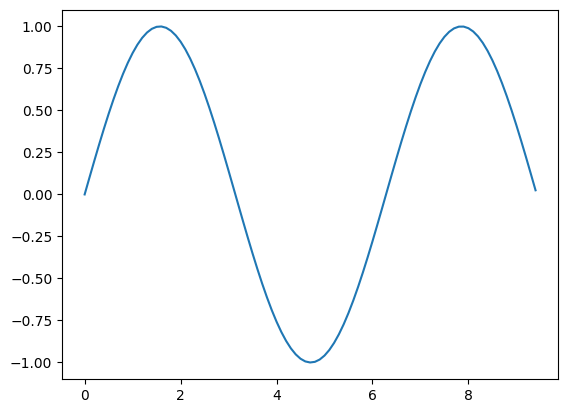

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

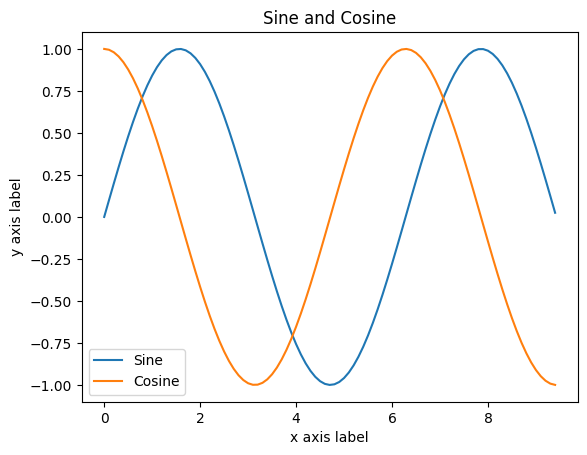

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

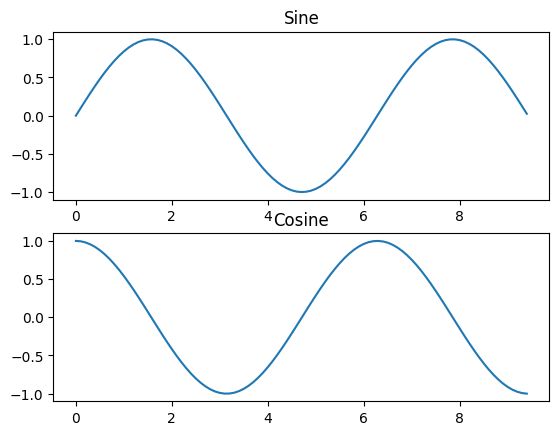

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

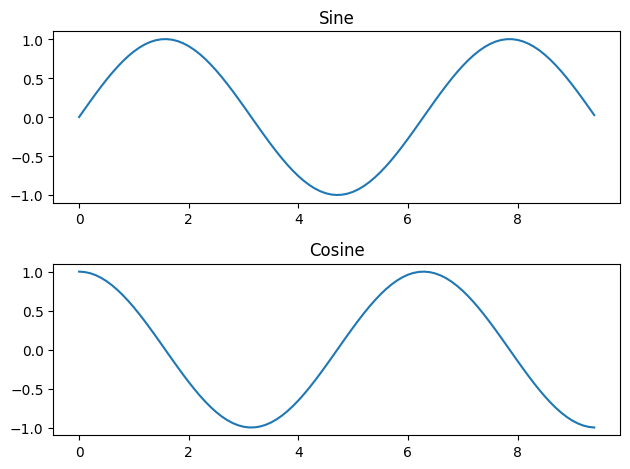

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.tight_layout()
plt.show()

## numpy 와 matplotlib 을 이용한 음성신호 생성  및 시각화

[0.0000000e+00 6.2500000e-05 1.2500000e-04 ... 2.9998125e+00 2.9998750e+00
 2.9999375e+00] (48000,)


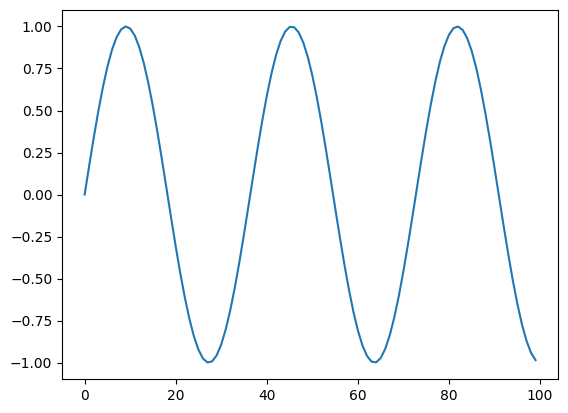

In [ ]:
sr = 16000
dur = 3
F = 440
t = np.arange(dur*sr)/sr
print(t,t.shape)
sig = np.sin(2*t*np.pi*440)
plt.plot(sig[:100])

In [ ]:
import IPython.display as ipd

In [ ]:
ipd.Audio(sig,rate=sr)

## 연습문제
A4(4옥타브 라)에 해당하는 주파수는 440Hz이다.

C4~C5에 해당하는 주파수가 아래와 같이 주어졌을때

진폭과 주파수가 1초단위로 변경하는 음성 샘플을 생성하라

In [ ]:
#Frequency(Hz) of C4 to C5 scales
scales = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]
sr = 16000
dur = 1
t = np.arange(dur*sr)/sr
x = []


# wav파일 읽기
- hexdump를 이용한 wav파일 구조 확인
- torchaudio를 이용한 wav파일 meta 정보 확인

## wav 파일 업로드
준비해둔 wav파일을 업로드

빨간색 표시된 부분을 클릭하거나 drag&drop으로 준비해온 wav파일을 업로드



<img src="https://github.com/june-oh/cseg109/blob/main/img/img_upload.png?raw=true" height=400>

# IPython.diplay.Audio 를 이용하여 wav파일 들어보기


In [ ]:
import IPython.display as ipd

In [ ]:
ipd.Audio("./16k_mono.wav")

## hexdump를 이용한 wav파일 header확인
```bash
!pip install -q pyhexdump
```

In [ ]:
!pip install  -q pyhexdump

In [ ]:
from pyhexdump import hexdump

## wav파일을 bytearray로 읽어와서 hexdump로 dump하기

In [ ]:
f = open("16k_mono.wav",'rb')
data = bytearray(f.read())


In [ ]:
data[:1024]

bytearray(b"RIFF\x18\xb9\x01\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80>\x00\x00\x00}\x00\x00\x02\x00\x10\x00LIST\x1a\x00\x00\x00INFOISFT\x0e\x00\x00\x00Lavf58.29.100\x00data\xd2\xb8\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

<img src="https://camo.githubusercontent.com/7896a8fd332e6bef660412186af98597e6564e1ff086d9b413dab1ab102d2042/687474703a2f2f736f756e6466696c652e736170702e6f72672f646f632f57617665466f726d61742f7761762d736f756e642d666f726d61742e676966">

In [ ]:
hexdump(data[:128])

pyhexdump: 128 bytes
ascii characters: GREEN
non-ascii: RED
Offset(h) | 00 01 02 03 04 05 06 07 08 09 0A 0B 0C 0D 0E 0F | String
--------------------------------------------------------------------------------
000000000 | 52 49 46 46 18 B9 01 00 57 41 56 45 66 6D 74 20 | RIFF....WAVEfmt 
000000001 | 10 00 00 00 01 00 01 00 80 3E 00 00 00 7D 00 00 | .........>...}..
000000002 | 02 00 10 00 4C 49 53 54 1A 00 00 00 49 4E 46 4F | ....LIST....INFO
000000003 | 49 53 46 54 0E 00 00 00 4C 61 76 66 35 38 2E 32 | ISFT....Lavf58.2
000000004 | 39 2E 31 30 30 00 64 61 74 61 D2 B8 01 00 00 00 | 9.100.data......
000000005 | 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 | ................
000000006 | 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 | ................
000000007 | 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 | ................


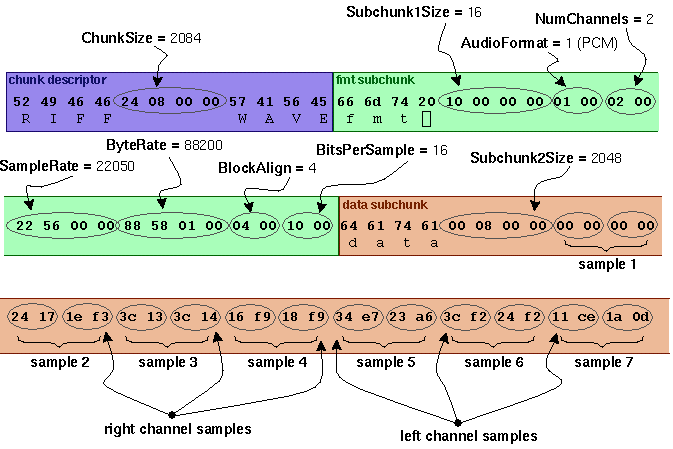

In [ ]:
data[:12]

bytearray(b'RIFF\x18\xb9\x01\x00WAVE')

In [ ]:
data[12:24]

bytearray(b'fmt \x10\x00\x00\x00\x01\x00\x01\x00')

In [ ]:
data[24:36]

bytearray(b'\x80>\x00\x00\x00}\x00\x00\x02\x00\x10\x00')

In [ ]:
data[36:36+12]

bytearray(b'LIST\x1a\x00\x00\x00INFO')

In [ ]:
import torchaudio
print(torchaudio.info("16k_mono.wav"))

AudioMetaData(sample_rate=16000, num_frames=56425, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [ ]:
!pip install praat-parselmouth


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 32.9 MB/s eta 0:00:00


In [ ]:
from parselmouth import TextGrid

In [ ]:
tgd = TextGrid.read("16k_mono.TextGrid")

In [ ]:
tgt = tgd.to_tgt()

In [ ]:
tgt.get_tier_names()

['어절', '음절']

In [ ]:
for i in tgt.get_tier_by_name('음절'):
  print(i)

Interval(0.14149436735736895, 0.25385898751339864, "그")
Interval(0.25385898751339864, 0.4931106177614103, "는")
Interval(0.5213867619785395, 0.7230754433716178, "괜")
Interval(0.7230754433716178, 0.8582902149879126, "찮")
Interval(0.8582902149879126, 0.9928641583027084, "은")
Interval(0.9928641583027084, 1.156530360473511, "척")
Interval(1.2004329471779094, 1.3440153834335804, "하")
Interval(1.3440153834335804, 1.5397123225664213, "려")
Interval(1.5397123225664213, 1.7513248064895524, "고")
Interval(2.038080391877386, 2.176616906289667, "애")
Interval(2.176616906289667, 2.3432157488902665, "쓰")
Interval(2.3432157488902665, 2.5291045364155975, "는")
Interval(2.5291045364155975, 2.6481459306409776, "것")
Interval(2.6481459306409776, 2.844651772768968, "같")
Interval(2.844651772768968, 3.11945905468482, "았")
Interval(3.11945905468482, 3.380346956894405, "다")
